# Province Gender Available Twitter Data - Metadata Statistics

In [1]:
import gzip
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pcodes = {"1": "Adana", "2": "Adıyaman", "3": "Afyonkarahisar", "4": "Ağrı", "68": "Aksaray", "5": "Amasya", "6": "Ankara",
          "7": "Antalya", "75": "Ardahan", "8": "Artvin", "9": "Aydın", "10": "Balıkesir", "74": "Bartın", "72": "Batman",
          "69": "Bayburt", "11": "Bilecik", "12": "Bingöl", "13": "Bitlis", "14": "Bolu", "15": "Burdur", "16": "Bursa",
          "17": "Çanakkale", "18": "Çankırı", "19": "Çorum", "20": "Denizli", "21": "Diyarbakır", "81": "Düzce", "22": "Edirne",
          "23": "Elazığ", "24": "Erzincan", "25": "Erzurum", "26": "Eskişehir", "27": "Gaziantep", "28": "Giresun",
          "29": "Gümüşhane", "30": "Hakkâri", "31": "Hatay", "76": "Iğdır", "32": "Isparta", "34": "İstanbul", "35": "İzmir",
          "46": "Kahramanmaraş", "78": "Karabük", "70": "Karaman", "36": "Kars", "37": "Kastamonu", "38": "Kayseri",
          "71": "Kırıkkale", "39": "Kırklareli", "40": "Kırşehir", "79": "Kilis", "41": "Kocaeli", "42": "Konya",
          "43": "Kütahya", "44": "Malatya", "45": "Manisa", "47": "Mardin", "33": "Mersin", "48": "Muğla", "49": "Muş",
          "50": "Nevşehir", "51": "Niğde", "52": "Ordu", "80": "Osmaniye", "53": "Rize", "54": "Sakarya", "55": "Samsun",
          "56": "Siirt", "57": "Sinop", "58": "Sivas", "63": "Şanlıurfa", "73": "Şırnak", "59": "Tekirdağ", "60": "Tokat",
          "61": "Trabzon", "62": "Tunceli", "64": "Uşak", "65": "Van", "77": "Yalova", "66": "Yozgat", "67": "Zonguldak"}

## Read Data from Gzip

In [3]:
with gzip.open("province_gender_available_metadata_added-220509_combined.txt.gz", "rb") as f:
    users = f.readlines()
    
for i in range(len(users)):
    users[i] = json.loads(users[i].decode("utf-8"))

In [4]:
print(f"Total User Count: {len(users)}")

Total User Count: 217790


## Create DataFrame

In [5]:
df = pd.DataFrame(users)

In [6]:
df.shape

(217790, 15)

In [7]:
df.head(3)

,location,description,name,screen_name,id_str,created_at,province_codes,genders,following,followers,tweets,followers_count,following_count,downloaded,pp
0,"adana, türkiye",nefes alıyorsak hala bir umut var demektir. fa...,ali,real107171,1158321552129187840,Mon Aug 05 10:19:13 +0000 2019,"[{'source': 'location', 'pcode': 1}]","[{'source': 'name', 'gender': 'male'}]","[126571977, 1974277500, 2784055768, 1097258683...","[721395301274238976, 1070013184344510464, 1510...","[{'twt_id_str': '1173723046072475649', 'twt_tx...",3.0,9.0,220318,1158321652691886080/VJc3tvbT_normal.jpg
1,"çanakkale, türkiye",emu-ı.t.,yahya,yahyahlvoglu,1702767367,Mon Aug 26 19:26:40 +0000 2013,"[{'source': 'location', 'pcode': 17}]","[{'source': 'name', 'gender': 'male'}, {'sourc...","[2390341533, 767691353144827906, 259925559, 34...","[2390341533, 957649186064949248, 1120358786097...","[{'ref_twt_id_str': '1421381248400994307', 're...",270.0,205.0,220318,1430022847607488516/KLhPDuBE_normal.jpg
2,"gaziantep, türkiye",galatasaray,can altay,canalta29003836,1161346708883816448,Tue Aug 13 18:40:06 +0000 2019,"[{'source': 'location', 'pcode': 27}]","[{'source': 'name', 'gender': 'male'}]","[1401495806142734337, 1245674500039102464, 983...","[1401495806142734337, 1290700623801876487, 124...","[{'twt_id_str': '1269646996362670081', 'twt_tx...",10.0,13.0,220318,1228998578703683585/Uq1zinZ-_normal.jpg


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217790 entries, 0 to 217789
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   location         217790 non-null  object 
 1   description      217790 non-null  object 
 2   name             217790 non-null  object 
 3   screen_name      217790 non-null  object 
 4   id_str           217790 non-null  object 
 5   created_at       217790 non-null  object 
 6   province_codes   217790 non-null  object 
 7   genders          217790 non-null  object 
 8   following        217790 non-null  object 
 9   followers        217790 non-null  object 
 10  tweets           217790 non-null  object 
 11  followers_count  215652 non-null  float64
 12  following_count  215652 non-null  float64
 13  downloaded       217790 non-null  object 
 14  pp               217790 non-null  object 
dtypes: float64(2), object(13)
memory usage: 24.9+ MB


## Download Counts

In [9]:
download_counts = pd.DataFrame(df["downloaded"].value_counts().sort_index()).reset_index().rename({"index": "date", "downloaded":"download_count"}, axis=1)
download_counts["date"] = download_counts["date"].apply(lambda x: x[4:] + "/" + x[2:4] + "/" + "20" + x[:2])
download_counts = download_counts.set_index("date")
download_counts

,download_count
date,
18/03/2022,50146
19/03/2022,303
20/03/2022,202
21/03/2022,221
22/03/2022,750
23/03/2022,1440
24/03/2022,1430
25/03/2022,1440
26/03/2022,1440


## User Statistics

In [10]:
province_codes_sources = []

for item in df["province_codes"]:
    province_codes_sources.append(item[0]['source'])
    
print("Province Code Source Counts:")
display(pd.Series(province_codes_sources).value_counts())

Province Code Source Counts:


location       154169
description     63617
screen_name         4
dtype: int64

In [11]:
gender_sources = []

for item in df["genders"]:
    gender_sources.append(item[0]['source'])
    
print("Gender Source Counts:")
display(pd.Series(gender_sources).value_counts())

Gender Source Counts:


name           206314
screen_name     11364
description       112
dtype: int64

### User Statistics - Location

In [12]:
sehir_counts = df["province_codes"].apply(lambda x: pcodes[str(x[0]["pcode"])]).value_counts()
sehir_counts = pd.DataFrame(sehir_counts).reset_index().rename({"index": "sehir", "province_codes":"user_count"}, axis=1)

In [13]:
sehir_counts[:60]

,sehir,user_count
0,İstanbul,55472
1,İzmir,16648
2,Ankara,13838
3,Trabzon,9721
4,Bursa,8569
5,Antalya,8106
6,Mersin,7554
7,Adana,5676
8,Kocaeli,4530
9,Samsun,3860


In [14]:
sehir_counts[60:]

,sehir,user_count
60,Bartın,505
61,Nevşehir,495
62,Kars,480
63,Kırıkkale,473
64,Sinop,468
65,Muş,451
66,Erzincan,423
67,Bitlis,406
68,Karaman,403
69,Bilecik,382


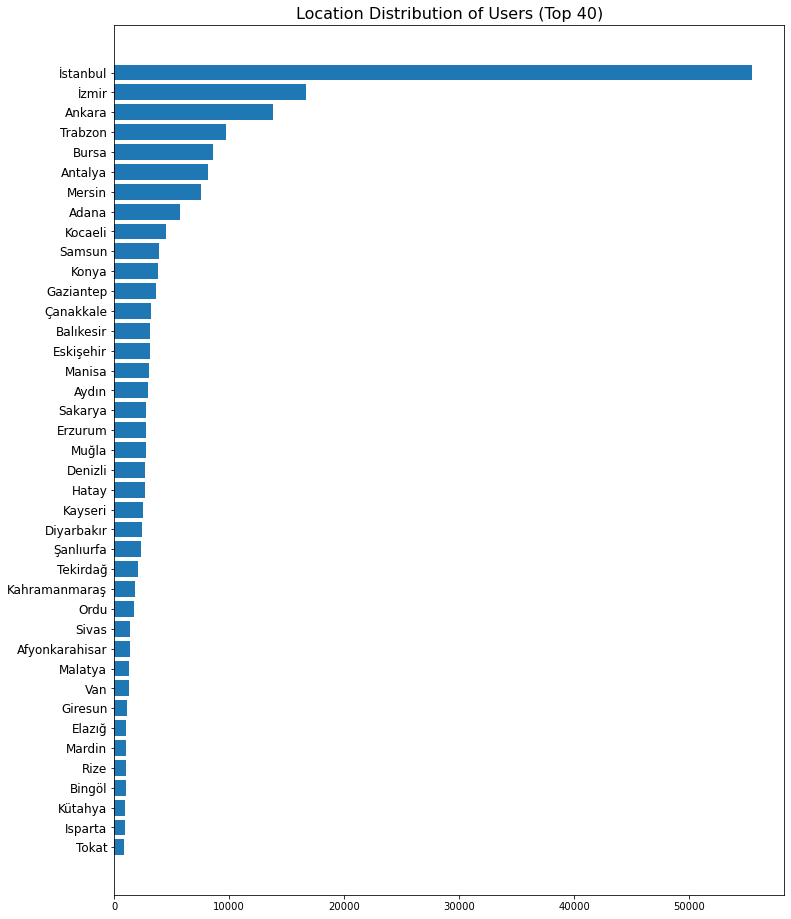

In [15]:
plt.figure(figsize=(12, 16))

plt.barh(sehir_counts["sehir"][:40], sehir_counts["user_count"][:40])
plt.title("Location Distribution of Users (Top 40)", fontsize=16)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
plt.show()

### User Statistics - Gender

In [16]:
gender_counts = pd.DataFrame(df["genders"].apply(lambda x: x[0]["gender"]).value_counts()).reset_index().rename({"index": "gender", "genders": "count"}, axis=1)
gender_counts = pd.concat([gender_counts, pd.Series([f"{x:.2f}%" for x in gender_counts["count"] / df.shape[0] * 100], name="percentages")], axis=1)
gender_counts = gender_counts.set_index("gender")
gender_counts

,count,percentages
gender,,
male,147699,67.82%
female,70091,32.18%


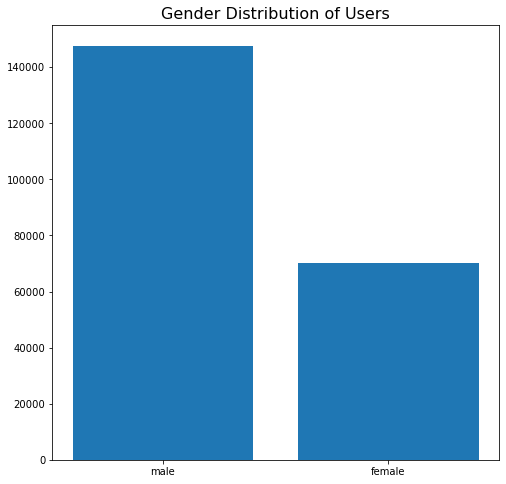

In [17]:
gender_counts = gender_counts.reset_index()
plt.figure(figsize=(8, 8))

plt.bar(gender_counts["gender"], gender_counts["count"])
plt.title("Gender Distribution of Users", fontsize=16)
plt.show()

## Tweet Statistics

In [18]:
tweets = []

for user in users:
    for tweet in user["tweets"]:
        if "twt_txt" in tweet.keys():
            tweets.append(tweet["twt_txt"])
        else:
            tweets.append(tweet["ref_twt_txt"])

In [19]:
print(f"Total tweet count: {len(tweets)}")
print(f"Unique tweet count: {len(set(tweets))}")

Total tweet count: 7475461
Unique tweet count: 5525390


### Tweet Statistics - Tweet Counts by Tweet Type

In [20]:
original_count = 0
reply_count = 0
retweet_count = 0
quote_count = 0
fav_count = 0

for i in range(len(df)):
    for tweet in df.loc[i, "tweets"]:
        if tweet["type"] == "original":
            original_count += 1
        elif tweet["type"] == "reply":
            reply_count += 1
        elif tweet["type"] == "retweet":
            retweet_count += 1
        elif tweet["type"] == "quote":
            quote_count += 1
        elif tweet["type"] == "fav":
            fav_count += 1

In [21]:
tweet_counts_by_type = pd.concat([pd.Series(["original", "reply", "retweet", "quote", "fav", "total"],
                                            name="tweet_type"),
                                  pd.Series([original_count, reply_count, retweet_count, quote_count, fav_count, len(tweets)],
                                            name="count")],
                                 axis=1)
tweet_counts_by_type = pd.concat([tweet_counts_by_type, pd.Series([f"{x:.2f}%" for x in tweet_counts_by_type["count"] / len(tweets) * 100], name="percentages")], axis=1)
tweet_counts_by_type = tweet_counts_by_type.set_index("tweet_type")
tweet_counts_by_type

,count,percentages
tweet_type,,
original,511199,6.84%
reply,262156,3.51%
retweet,239497,3.20%
quote,15895,0.21%
fav,6446714,86.24%
total,7475461,100.00%


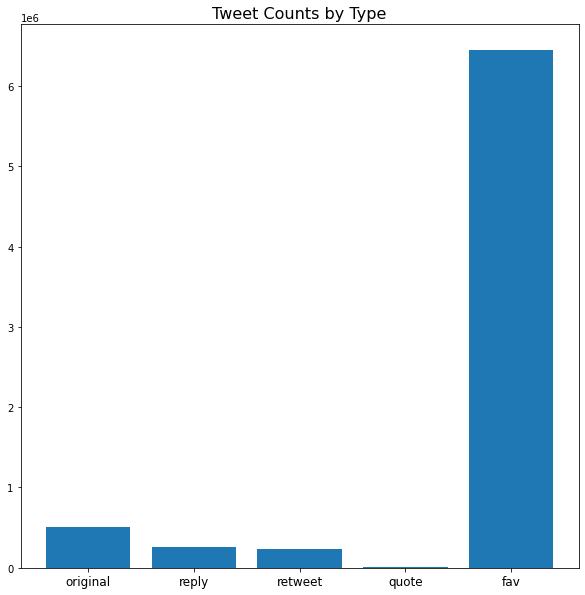

In [22]:
tweet_counts_by_type = tweet_counts_by_type.reset_index()
tweet_counts_by_type = tweet_counts_by_type.drop(5)

plt.figure(figsize=(10, 10))

plt.bar(tweet_counts_by_type["tweet_type"], tweet_counts_by_type["count"])
plt.title("Tweet Counts by Type", fontsize=16)
plt.xticks(fontsize=12)
plt.show()

### Tweet Statistics - Tweet Counts by Year

In [23]:
tweet_years = []

for tweet_list in df["tweets"]:
    for tweet in tweet_list:
        if "-" in tweet["twt_date"]:
            tweet_years.append(tweet["twt_date"][:4])
        else:
            tweet_years.append("20" + tweet["twt_date"][:2])

In [24]:
yearly_tweet_counts = pd.DataFrame(pd.Series(tweet_years).value_counts().sort_index()).reset_index().rename({"index":"year", 0:"count"}, axis=1)
yearly_tweet_counts = pd.concat([yearly_tweet_counts, pd.Series([f"{x:.3f}%" for x in yearly_tweet_counts["count"] / yearly_tweet_counts["count"].sum() * 100], name="percentages")], axis=1)
yearly_tweet_counts = yearly_tweet_counts.set_index("year")
yearly_tweet_counts

,count,percentages
year,,
2006,85,0.001%
2007,13,0.000%
2008,41,0.001%
2009,143,0.002%
2010,1258,0.017%
2011,9231,0.123%
2012,23428,0.313%
2013,102257,1.368%
2014,227386,3.042%


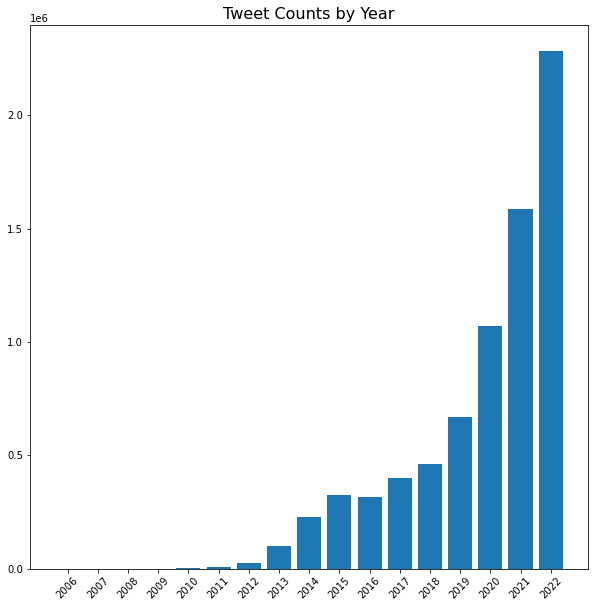

In [25]:
yearly_tweet_counts = yearly_tweet_counts.reset_index()

plt.figure(figsize=(10, 10))

plt.bar(yearly_tweet_counts["year"], yearly_tweet_counts["count"])
plt.xticks(rotation=45)
plt.title("Tweet Counts by Year", fontsize=16)
plt.show()

### Metadata Statistics

In [26]:
no_tweet_users_count = 0

for i in range(len(df)):
    if len(df.loc[i, "tweets"]) == 0:
        no_tweet_users_count += 1
        
print(f"Count of users with no tweet: {no_tweet_users_count}")

Count of users with no tweet: 53630


In [27]:
no_tweet_no_fol_count = 0

for i in range(len(df)):
    if len(df.loc[i, "tweets"]) == 0 and pd.isnull(df.loc[i, "followers_count"]):
        no_tweet_no_fol_count += 1
        
print(f"Count of users with no tweet no followers_count: {no_tweet_no_fol_count}")

Count of users with no tweet no followers_count: 2119


In [28]:
no_tweet_no_fol_count_no_pp = 0

for i in range(len(df)):
    if len(df.loc[i, "tweets"]) == 0 and pd.isnull(df.loc[i, "followers_count"]) and df.loc[i, "pp"] == "":
        no_tweet_no_fol_count_no_pp += 1
        
print(f"Count of users with no tweet no followers_count no pp: {no_tweet_no_fol_count_no_pp}")

Count of users with no tweet no followers_count no pp: 2109


In [29]:
#no_location = 0
#
#for location in df["location"]:
#    if location == "":
#        no_location += 1
#        
#print(f"Count of users with no location: {no_location}")